In [10]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import ultralytics
import os


import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [11]:
cd yolov5

C:\Users\Mark\Notebooks\HACKATON\yolov5


In [12]:
!pip install -r requirements.txt

In [13]:
cd ..

C:\Users\Mark\Notebooks\HACKATON


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Mark/.cache\torch\hub\master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success  7.1s, installed 3 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0']
requirements:  Restart runtime or rerun command for updates to take effect



YOLOv5  2024-6-15 Python-3.11.9 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)

Fusing layers... 
Model summary: 212 layers, 20869098 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


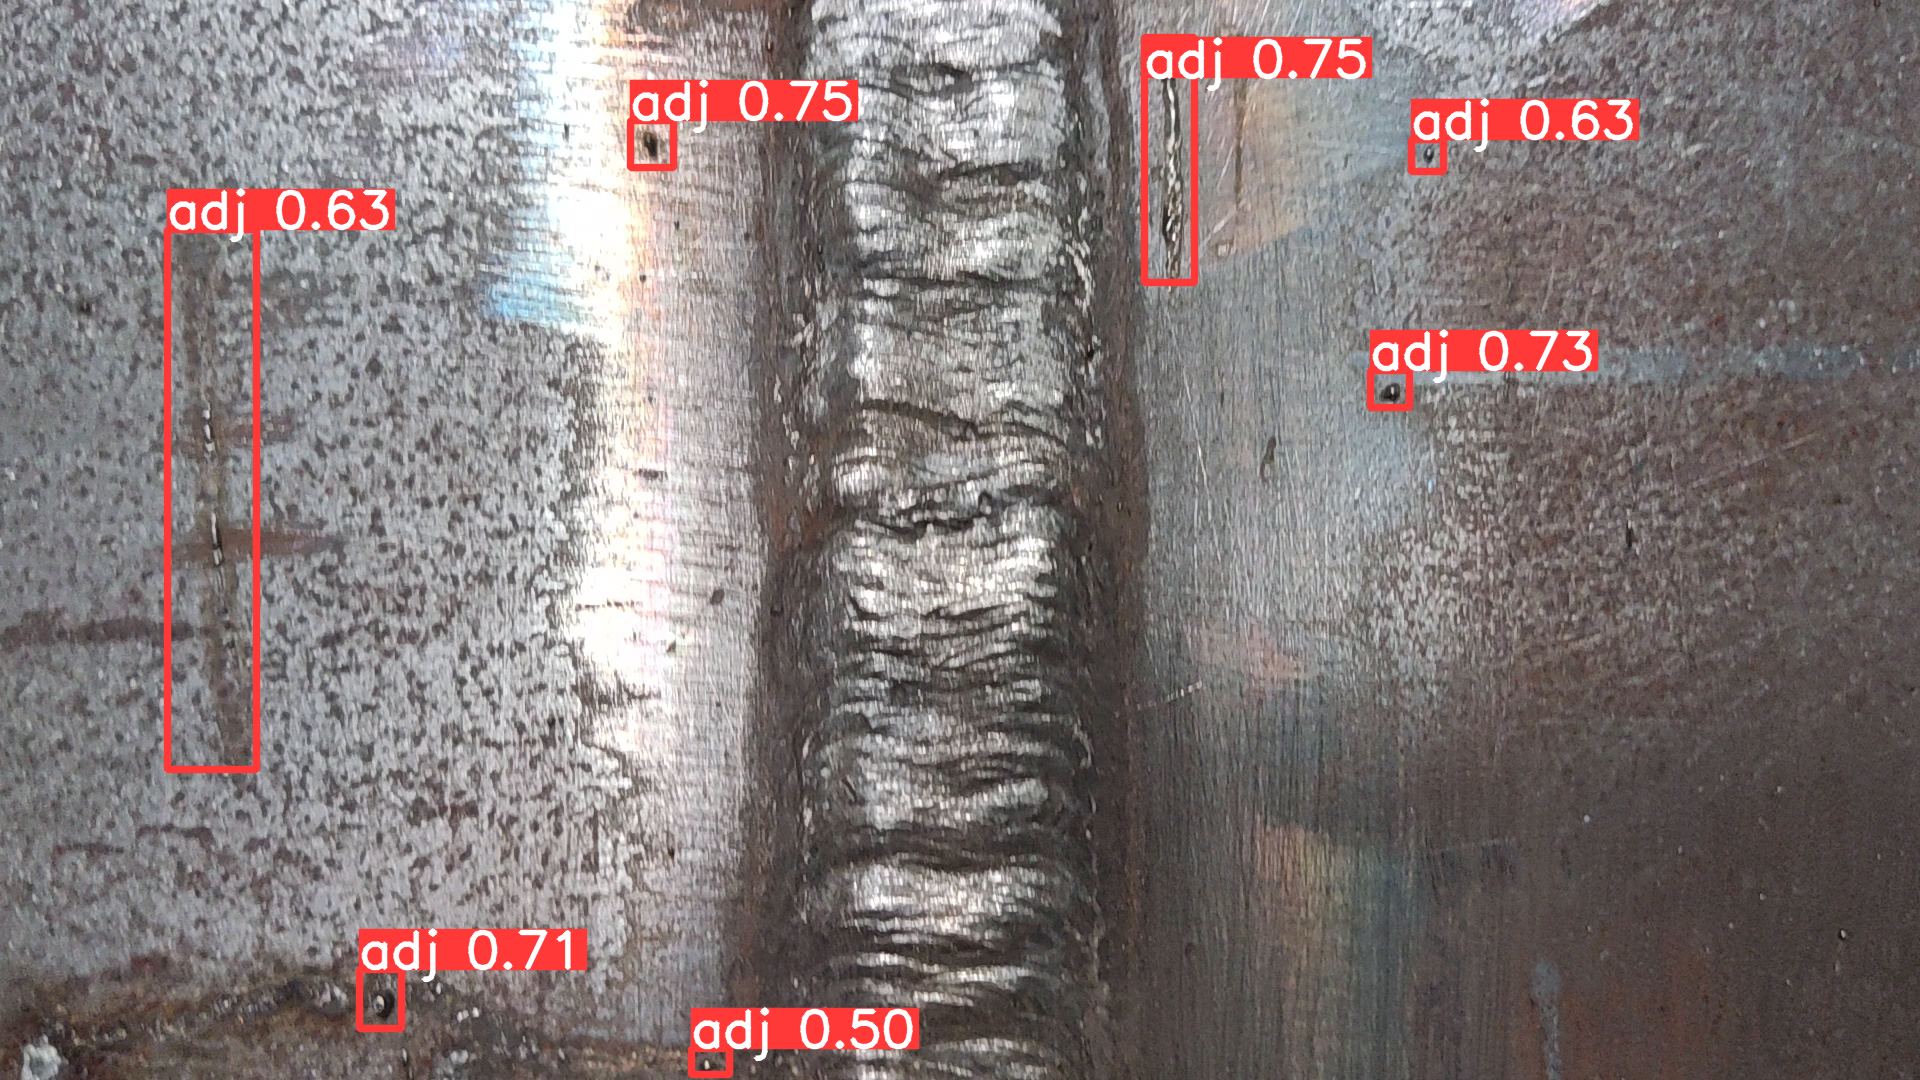

Saved YOLO labels to outputs/labels\2 (1).txt


In [14]:
def predict(image_path, model_path, conf_threshold=0.35, iou_threshold=0.45):
    
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)
    
    model.conf = conf_threshold  # порог уверенности
    model.iou = iou_threshold    # порог NMS
    
    img = Image.open(image_path)
    
    results = model(img)
    
    results.show()

    preds = results.xyxy[0].cpu().numpy()

    label_path = os.path.join(output_labels_path, os.path.splitext(os.path.basename(image_path))[0] + '.txt')
    with open(label_path, 'w') as f:
        for pred in preds:
            x1, y1, x2, y2, conf, cls = pred
            # Конвертация координат в формат YOLO
            img_width, img_height = img.size
            x_center = (x1 + x2) / 2 / img_width
            y_center = (y1 + y2) / 2 / img_height
            width = (x2 - x1) / img_width
            height = (y2 - y1) / img_height
            f.write(f'{int(cls)} {x_center} {y_center} {width} {height}\n')
    print(f'Saved YOLO labels to {label_path}')
    
    return results

image_path = 'all_data/2 (1).jpg'
model_path = 'weights/best_zakhar.pt'
output_labels_path = 'outputs/labels'
output_images_path = 'outputs/images'
results = predict(image_path, model_path)

In [20]:
annotated_img = results.render()[0]
annotated_img = Image.fromarray(annotated_img)
annotated_img_path = os.path.join(output_images_path, os.path.basename(image_path))
annotated_img.save(annotated_img_path)
print(f'Saved annotated image to {annotated_img_path}')

Saved annotated image to outputs/images\3 (12).jpg
